In [1]:
import iris

In [2]:
fname_abs = 'absolute.nc'
temp_abs = iris.load_cube(fname_abs)

/home/bill/miniconda3/envs/scipy-cartopy-tutorial/lib/python3.6/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:2029: UserWarning: Gracefully filling 'lat' dimension coordinate masked points
  warnings.warn(msg.format(str(cf_coord_var.cf_name)))
/home/bill/miniconda3/envs/scipy-cartopy-tutorial/lib/python3.6/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:2029: UserWarning: Gracefully filling 'lon' dimension coordinate masked points
  warnings.warn(msg.format(str(cf_coord_var.cf_name)))
/home/bill/miniconda3/envs/scipy-cartopy-tutorial/lib/python3.6/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:2029: UserWarning: Gracefully filling 'time' dimension coordinate masked points
  warnings.warn(msg.format(str(cf_coord_var.cf_name)))


In [3]:
temp_abs

<iris 'Cube' of CRU_Global_1961-1990_Mean_Monthly_Surface_Temperature_Climatology / (celsius) (time: 12; latitude: 36; longitude: 72)>

In [4]:
print(temp_abs.coord('time'))

DimCoord(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int16), standard_name='time', units=Unit('months'), var_name='time')


In [5]:
fname_anom = 'CRUTEM.4.6.0.0.anomalies.nc'
temp_anom = iris.load_cube(fname_anom, 'temperature_anomaly')

/home/bill/miniconda3/envs/scipy-cartopy-tutorial/lib/python3.6/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:2029: UserWarning: Gracefully filling 'latitude' dimension coordinate masked points
  warnings.warn(msg.format(str(cf_coord_var.cf_name)))
/home/bill/miniconda3/envs/scipy-cartopy-tutorial/lib/python3.6/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:2029: UserWarning: Gracefully filling 'longitude' dimension coordinate masked points
  warnings.warn(msg.format(str(cf_coord_var.cf_name)))
/home/bill/miniconda3/envs/scipy-cartopy-tutorial/lib/python3.6/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:2029: UserWarning: Gracefully filling 'time' dimension coordinate masked points
  warnings.warn(msg.format(str(cf_coord_var.cf_name)))
/home/bill/miniconda3/envs/scipy-cartopy-tutorial/lib/python3.6/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:2029: UserWarning: Gracefully fill

In [6]:
temp_anom

<iris 'Cube' of temperature_anomaly / (K) (time: 2016; latitude: 36; longitude: 72)>

In [7]:
print(temp_anom.coord('time'))

DimCoord([1850-01-16 12:00:00, 1850-02-15 00:00:00, 1850-03-16 12:00:00, ...,
       2017-10-16 12:00:00, 2017-11-16 00:00:00, 2017-12-16 12:00:00], standard_name='time', calendar='gregorian', long_name='time', var_name='time')


In [8]:
import iris.coord_categorisation as icat

In [9]:
decade = lambda coord, point: coord.units.num2date(point).year//10*10
icat.add_categorised_coord(temp_anom, 'decade', 'time', decade)

In [10]:
print(temp_anom.coord('decade'))

AuxCoord(array([1850, 1850, 1850, ..., 2010, 2010, 2010]), standard_name=None, units=Unit('1'), long_name='decade')


In [11]:
icat.add_month_number(temp_anom, 'time')

In [12]:
temp_anom

<iris 'Cube' of temperature_anomaly / (K) (time: 2016; latitude: 36; longitude: 72)>

In [13]:
sorted(set(temp_anom.coord('decade').points))

[1850,
 1860,
 1870,
 1880,
 1890,
 1900,
 1910,
 1920,
 1930,
 1940,
 1950,
 1960,
 1970,
 1980,
 1990,
 2000,
 2010]

In [14]:
temp_anom_mean = temp_anom.aggregated_by(['decade', 'month_number'], iris.analysis.MEAN)

In [15]:
temp_anom_mean

<iris 'Cube' of temperature_anomaly / (K) (time: 204; latitude: 36; longitude: 72)>

In [16]:
print(temp_anom_mean.coord('month_number'))

AuxCoord(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,
        6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
       11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,
        4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,
        9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,
        2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,
        7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,
       12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,
        5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9,
       10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,
        3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,
        8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]), standard_name=None, units=Unit('1'), long_name='month_number')


In [17]:
print(temp_anom_mean.coord('decade'))

AuxCoord(array([1850, 1850, 1850, 1850, 1850, 1850, 1850, 1850, 1850, 1850, 1850,
       1850, 1860, 1860, 1860, 1860, 1860, 1860, 1860, 1860, 1860, 1860,
       1860, 1860, 1870, 1870, 1870, 1870, 1870, 1870, 1870, 1870, 1870,
       1870, 1870, 1870, 1880, 1880, 1880, 1880, 1880, 1880, 1880, 1880,
       1880, 1880, 1880, 1880, 1890, 1890, 1890, 1890, 1890, 1890, 1890,
       1890, 1890, 1890, 1890, 1890, 1900, 1900, 1900, 1900, 1900, 1900,
       1900, 1900, 1900, 1900, 1900, 1900, 1910, 1910, 1910, 1910, 1910,
       1910, 1910, 1910, 1910, 1910, 1910, 1910, 1920, 1920, 1920, 1920,
       1920, 1920, 1920, 1920, 1920, 1920, 1920, 1920, 1930, 1930, 1930,
       1930, 1930, 1930, 1930, 1930, 1930, 1930, 1930, 1930, 1940, 1940,
       1940, 1940, 1940, 1940, 1940, 1940, 1940, 1940, 1940, 1940, 1950,
       1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950,
       1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960,
       1960, 1970, 1970, 1970, 1970, 1970,

In [18]:
print(temp_anom_mean.coord('time'))

DimCoord([1854-07-18 00:00:00, 1854-08-16 12:00:00, 1854-09-15 00:00:00,
       1854-10-15 12:00:00, 1854-11-15 00:00:00, 1854-12-15 12:00:00,
       1855-01-15 00:00:00, 1855-02-15 00:00:00, 1855-03-17 12:00:00,
       1855-04-17 00:00:00, 1855-05-17 12:00:00, 1855-06-17 00:00:00,
       1864-07-17 12:00:00, 1864-08-16 06:00:00, 1864-09-15 00:00:00,
       1864-10-15 12:00:00, 1864-11-15 00:00:00, 1864-12-15 12:00:00,
       1865-01-15 00:00:00, 1865-02-15 00:00:00, 1865-03-17 12:00:00,
       1865-04-17 00:00:00, 1865-05-17 12:00:00, 1865-06-17 00:00:00,
       1874-07-18 00:00:00, 1874-08-16 12:00:00, 1874-09-15 00:00:00,
       1874-10-15 12:00:00, 1874-11-15 00:00:00, 1874-12-15 12:00:00,
       1875-01-15 00:00:00, 1875-02-15 00:00:00, 1875-03-17 12:00:00,
       1875-04-17 00:00:00, 1875-05-17 12:00:00, 1875-06-17 00:00:00,
       1884-07-17 12:00:00, 1884-08-16 06:00:00, 1884-09-15 00:00:00,
       1884-10-15 12:00:00, 1884-11-15 00:00:00, 1884-12-15 12:00:00,
       1885-01-15

In [19]:
constraint = iris.Constraint(decade=1870, month_number=lambda point: point>=10)
temp_anom_mean_journey = temp_anom_mean.extract(constraint)

In [20]:
temp_anom_mean_journey

<iris 'Cube' of temperature_anomaly / (K) (time: 3; latitude: 36; longitude: 72)>

In [21]:
print(temp_anom_mean_journey.coord('month_number'))

AuxCoord(array([10, 11, 12]), standard_name=None, units=Unit('1'), long_name='month_number')


In [22]:
print(temp_anom_mean_journey.coord('decade'))

AuxCoord(array([1870, 1870, 1870]), standard_name=None, units=Unit('1'), long_name='decade')


In [23]:
print(temp_anom_mean_journey.coord('time'))

DimCoord([1875-04-17 00:00:00, 1875-05-17 12:00:00, 1875-06-17 00:00:00], bounds=[[1870-10-16 12:00:00, 1879-10-16 12:00:00],
       [1870-11-16 00:00:00, 1879-11-16 00:00:00],
       [1870-12-16 12:00:00, 1879-12-16 12:00:00]], standard_name='time', calendar='gregorian', long_name='time', var_name='time')


In [24]:
constraint = iris.Constraint(time=lambda value: value>=10)
temp_abs_journey = temp_abs.extract(constraint)

In [25]:
temp_abs_journey

<iris 'Cube' of CRU_Global_1961-1990_Mean_Monthly_Surface_Temperature_Climatology / (celsius) (time: 3; latitude: 36; longitude: 72)>

In [26]:
temp_abs_journey.convert_units('K')

In [27]:
temp_abs_journey

<iris 'Cube' of CRU_Global_1961-1990_Mean_Monthly_Surface_Temperature_Climatology / (K) (time: 3; latitude: 36; longitude: 72)>

In [28]:
data = temp_anom_mean_journey.data + temp_abs_journey.data
temp_mean_journey = temp_anom_mean_journey.copy(data)

In [29]:
temp_mean_journey.rename('Mean Surface Temperature')
temp_mean_journey.attributes['comment'] = 'Decadal mean surface temperature for Oct-Dec 1870s'

In [30]:
temp_mean_journey

<iris 'Cube' of Mean Surface Temperature / (K) (time: 3; latitude: 36; longitude: 72)>

/home/bill/miniconda3/envs/scipy-cartopy-tutorial/lib/python3.6/site-packages/iris/coords.py:1000: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))
/home/bill/miniconda3/envs/scipy-cartopy-tutorial/lib/python3.6/site-packages/iris/coords.py:1000: UserWarning: Coordinate 'latitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))


<IPython.core.display.Javascript object>


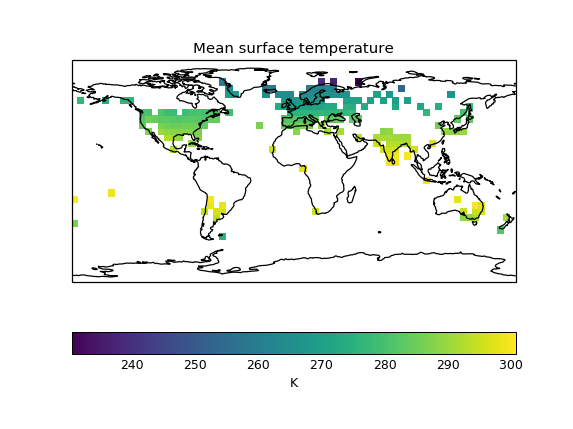

In [31]:
%matplotlib notebook

import iris.quickplot as qplt
import matplotlib.pyplot as plt

qplt.pcolormesh(temp_mean_journey[0])
plt.gca().coastlines()

In [32]:
# force the fill-value here...

#fill_value = temp_mean_journey.data.fill_value
#iris.save(temp_mean_journey, 'fogg_mean_surface_temp.nc', fill_value=fill_value)